### Decision Trees
#### [Source](https://lagunita.stanford.edu/c4x/HumanitiesandScience/StatLearning/asset/ch8.html)

We will have a look at the Carseats data using the tree package in R, as in the lab in the book. We create a binary response variable High (for higg sales), and we include it in the same dataframe.

In [1]:
ls()

character(0)

In [2]:
rm(list = ls())

In [3]:
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,340057.0,18.2,592000.0,31.7,460000.0,24.6
Vcells,544706.0,4.2,1023718.0,7.9,834092.0,6.4


In [4]:
gcinfo(TRUE)

[1] FALSE

In [10]:
#install.packages(c("ISLR","tree"), dependencies =TRUE)
suppressMessages(require(ISLR))
require(tree)

In [11]:
suppressMessages(attach(Carseats))

In [12]:
#?Carseats

In [14]:
head(Carseats)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.5,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.4,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
6,10.81,124,113,13,501,72,Bad,78,16,No,Yes


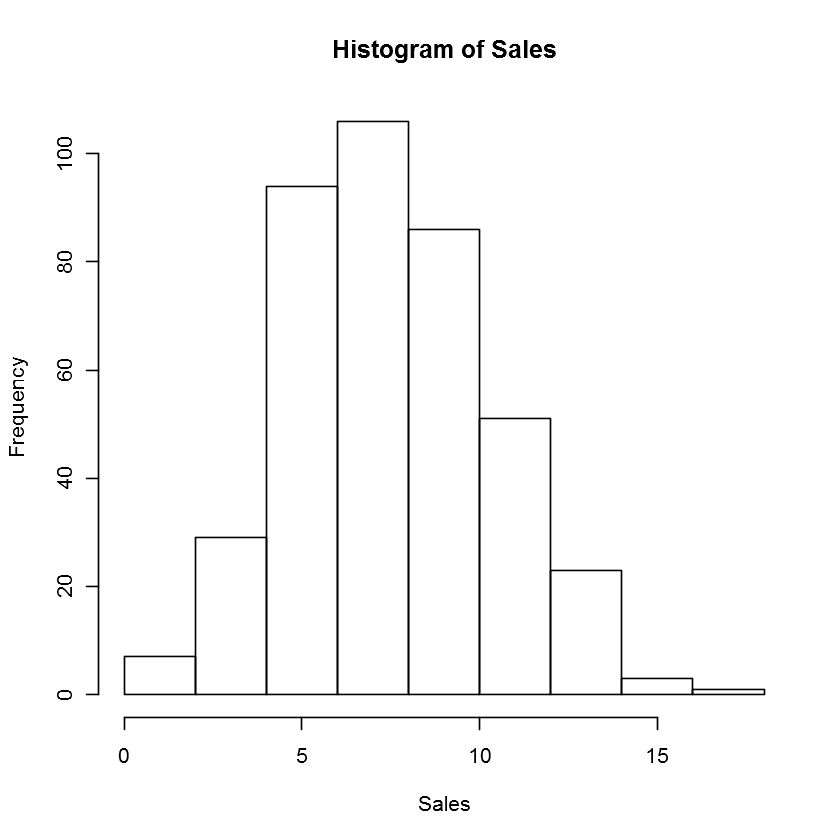

In [13]:
hist(Sales)

In [15]:
High = ifelse(Sales <= 8, "No", "Yes")
Carseats = data.frame(Carseats, High); head(Carseats)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
1,9.5,138,73,11,276,120,Bad,42,17,Yes,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Yes
4,7.4,117,100,4,466,97,Medium,55,14,Yes,Yes,No
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No,No
6,10.81,124,113,13,501,72,Bad,78,16,No,Yes,Yes


Now we fit a tree to these data, and summarize and plot it. Notice that we have to exclude Sales from the right-hand side of the formula, because the response is derived from it.

In [16]:
tree.carseats = tree(High ~ . - Sales, data = Carseats)

In [17]:
summary(tree.carseats)


Classification tree:
tree(formula = High ~ . - Sales, data = Carseats)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Income"      "CompPrice"   "Population" 
[6] "Advertising" "Age"         "US"         
Number of terminal nodes:  27 
Residual mean deviance:  0.4575 = 170.7 / 373 
Misclassification error rate: 0.09 = 36 / 400 

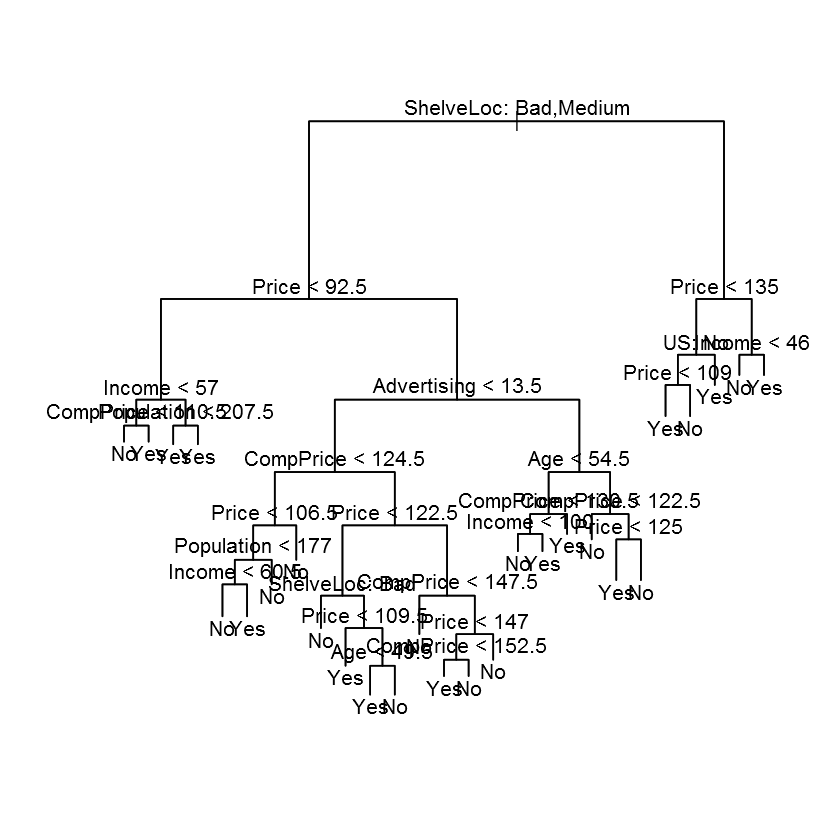

In [19]:
plot(tree.carseats)
text(tree.carseats, pretty = 0)

For a detailed summary of the tree, print it:

In [20]:
tree.carseats

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

  1) root 400 541.500 No ( 0.59000 0.41000 )  
    2) ShelveLoc: Bad,Medium 315 390.600 No ( 0.68889 0.31111 )  
      4) Price < 92.5 46  56.530 Yes ( 0.30435 0.69565 )  
        8) Income < 57 10  12.220 No ( 0.70000 0.30000 )  
         16) CompPrice < 110.5 5   0.000 No ( 1.00000 0.00000 ) *
         17) CompPrice > 110.5 5   6.730 Yes ( 0.40000 0.60000 ) *
        9) Income > 57 36  35.470 Yes ( 0.19444 0.80556 )  
         18) Population < 207.5 16  21.170 Yes ( 0.37500 0.62500 ) *
         19) Population > 207.5 20   7.941 Yes ( 0.05000 0.95000 ) *
      5) Price > 92.5 269 299.800 No ( 0.75465 0.24535 )  
       10) Advertising < 13.5 224 213.200 No ( 0.81696 0.18304 )  
         20) CompPrice < 124.5 96  44.890 No ( 0.93750 0.06250 )  
           40) Price < 106.5 38  33.150 No ( 0.84211 0.15789 )  
             80) Population < 177 12  16.300 No ( 0.58333 0.41667 )  
              160) Income < 60.5 6   0

Lets create a training and test set (250,150) split of the 400 observations, grow the tree on the training set, and evaluate its performence on the test set.

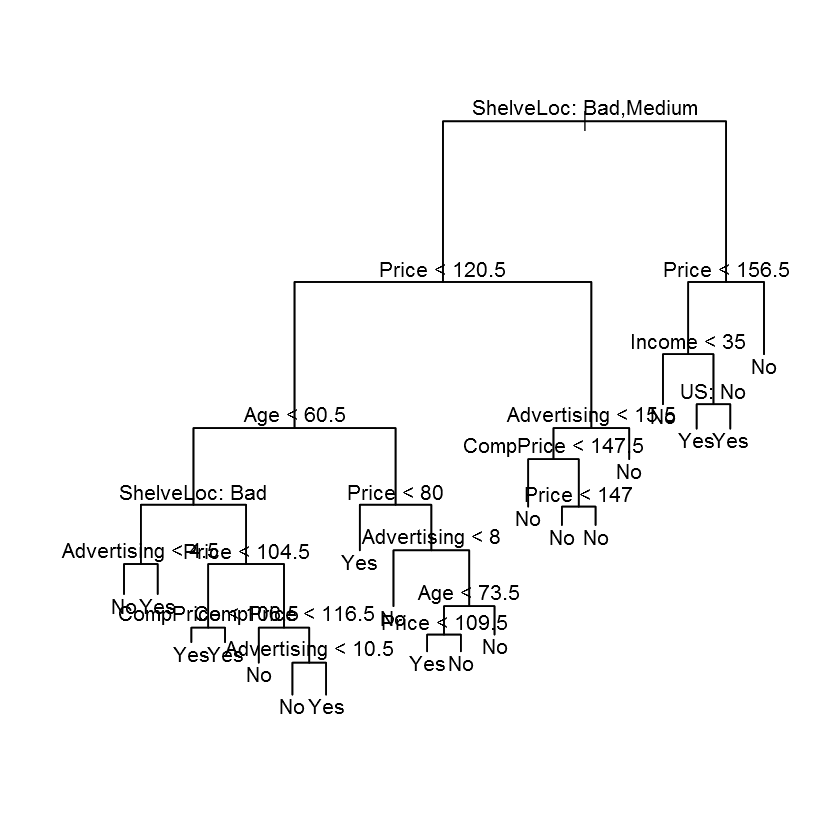

In [21]:
set.seed(1011)
train = sample(1:nrow(Carseats), 250)
tree.carseats = tree(High ~ . - Sales, Carseats, subset = train)
plot(tree.carseats)
text(tree.carseats, pretty = 0)

In [22]:
tree.pred = predict(tree.carseats, Carseats[-train, ], type = "class") #type:class means classification
with(Carseats[-train, ], table(tree.pred, High))

         High
tree.pred No Yes
      No  72  27
      Yes 18  33

In [23]:
(72 + 33)/150

[1] 0.7

This tree was grown to full depth, and might be too variable. We now use CV to prune it.

In [18]:
?tree::prune.misclass

prune.tree {tree},R Documentation
tree,fitted model object of class tree. This is assumed to be the result of some function that produces an object with the same named components as that returned by the tree() function.
k,"cost-complexity parameter defining either a specific subtree of tree (k a scalar) or the (optional) sequence of subtrees minimizing the cost-complexity measure (k a vector). If missing, k is determined algorithmically."
best,"integer requesting the size (i.e. number of terminal nodes) of a specific subtree in the cost-complexity sequence to be returned. This is an alternative way to select a subtree than by supplying a scalar cost-complexity parameter k. If there is no tree in the sequence of the requested size, the next largest is returned."
newdata,"data frame upon which the sequence of cost-complexity subtrees is evaluated. If missing, the data used to grow the tree are used."
nwts,weights for the newdata cases.
method,"character string denoting the measure of node heterogeneity used to guide cost-complexity pruning. For regression trees, only the default, deviance, is accepted. For classification trees, the default is deviance and the alternative is misclass (number of misclassifications or total loss)."
loss,a matrix giving for each true class (row) the numeric loss of predicting the class (column). The classes should be in the order of the levels of the response. It is conventional for a loss matrix to have a zero diagonal. The default is 0–1 loss.
eps,"a lower bound for the probabilities, used to compute deviances if events of predicted probability zero occur in newdata."
size,number of terminal nodes in each tree in the cost-complexity pruning sequence.
deviance,total deviance of each tree in the cost-complexity pruning sequence.


In [19]:
?tree::cv.tree # Cross-validation for Choosing Tree Complexity
# Runs a K-fold cross-validation experiment to find the deviance or number of misclassifications 
# as a function of the cost-complexity parameter k
    

cv.tree {tree},R Documentation
object,"An object of class ""tree""."
rand,"Optionally an integer vector of the length the number of cases used to create object, assigning the cases to different groups for cross-validation."
FUN,The function to do the pruning.
K,The number of folds of the cross-validation.
...,Additional arguments to FUN.


In [24]:
cv.carseats = cv.tree(tree.carseats, FUN = prune.misclass)
cv.carseats

$size
 [1] 20 14 13 10  9  7  6  5  2  1

$dev
 [1]  65  65  57  57  59  64  64  59  78 104

$k
 [1]      -Inf  0.000000  1.000000  1.333333  2.000000  2.500000  4.000000
 [8]  5.000000  9.000000 31.000000

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

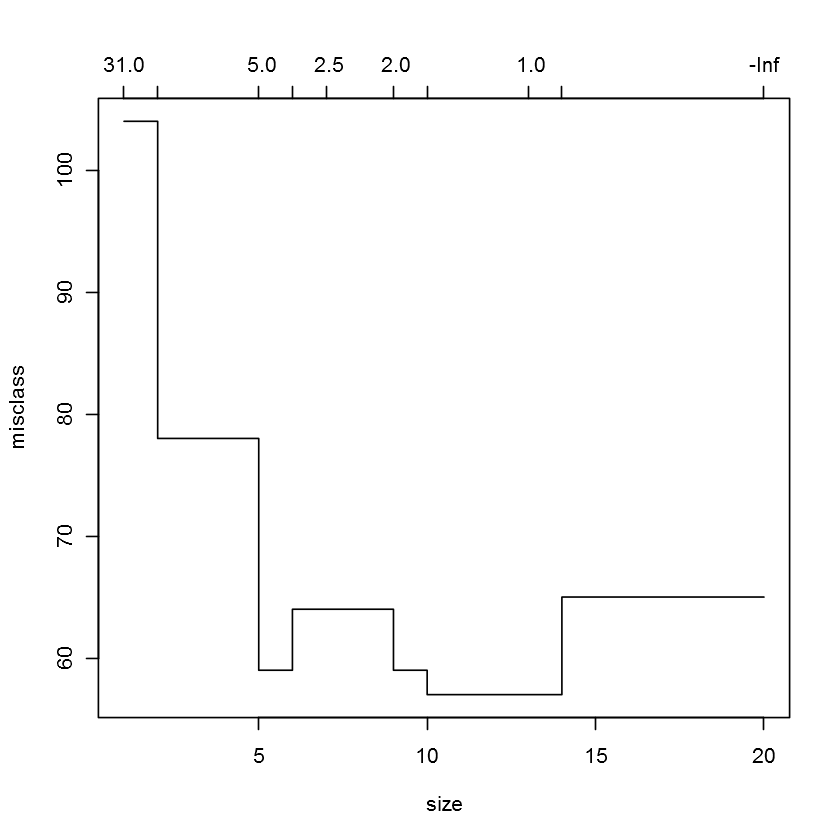

In [25]:
plot(cv.carseats)

In [22]:
?tree::prune.misclass #Cost-complexity Pruning of Tree Object
# Determines a nested sequence of subtrees of the supplied tree by recursively “snipping” off the least important splits.

prune.tree {tree},R Documentation
tree,fitted model object of class tree. This is assumed to be the result of some function that produces an object with the same named components as that returned by the tree() function.
k,"cost-complexity parameter defining either a specific subtree of tree (k a scalar) or the (optional) sequence of subtrees minimizing the cost-complexity measure (k a vector). If missing, k is determined algorithmically."
best,"integer requesting the size (i.e. number of terminal nodes) of a specific subtree in the cost-complexity sequence to be returned. This is an alternative way to select a subtree than by supplying a scalar cost-complexity parameter k. If there is no tree in the sequence of the requested size, the next largest is returned."
newdata,"data frame upon which the sequence of cost-complexity subtrees is evaluated. If missing, the data used to grow the tree are used."
nwts,weights for the newdata cases.
method,"character string denoting the measure of node heterogeneity used to guide cost-complexity pruning. For regression trees, only the default, deviance, is accepted. For classification trees, the default is deviance and the alternative is misclass (number of misclassifications or total loss)."
loss,a matrix giving for each true class (row) the numeric loss of predicting the class (column). The classes should be in the order of the levels of the response. It is conventional for a loss matrix to have a zero diagonal. The default is 0–1 loss.
eps,"a lower bound for the probabilities, used to compute deviances if events of predicted probability zero occur in newdata."
size,number of terminal nodes in each tree in the cost-complexity pruning sequence.
deviance,total deviance of each tree in the cost-complexity pruning sequence.


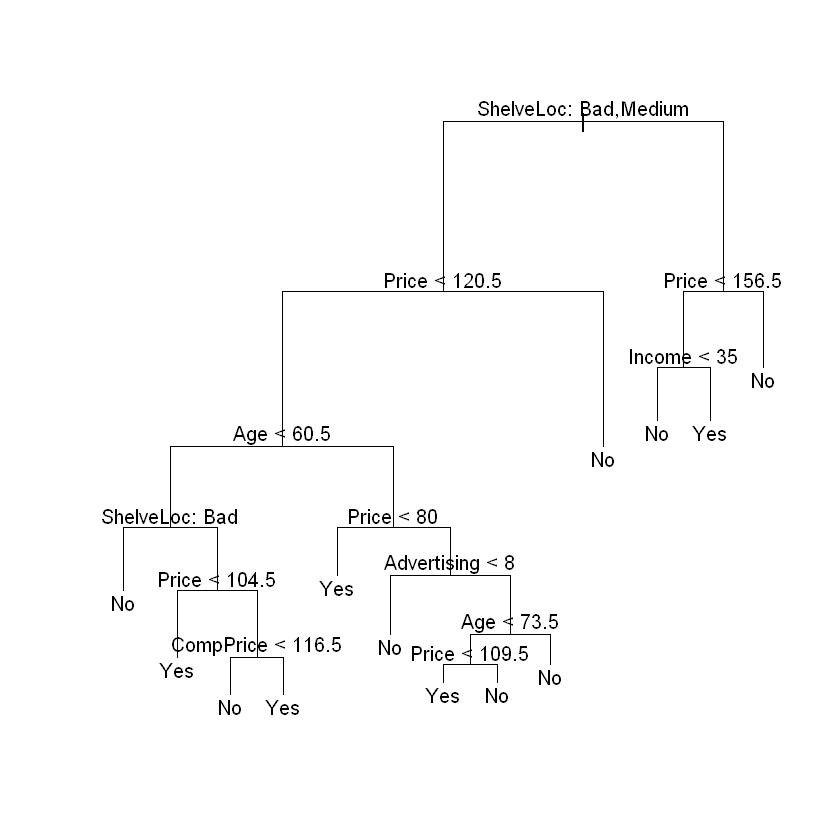

In [23]:
prune.carseats = prune.misclass(tree.carseats, best = 13)
plot(prune.carseats)
text(prune.carseats, pretty = 0)

Now lets evaluate this pruned tree on the test data.

In [24]:
tree.pred = predict(prune.carseats, Carseats[-train, ], type = "class")
with(Carseats[-train, ], table(tree.pred, High))

         High
tree.pred No Yes
      No  72  28
      Yes 18  32

In [25]:
(72 + 32)/150

[1] 0.6933333

It has done about the same as our original tree. So pruning did not hurt us wrt misclassification errors, and gave us a simpler tree.

----
#### Random Forests and Boosting

These methods use trees as building blocks to build more complex models. Here we will use the Boston housing data to explore random forests and boosting. These data are in the `MASS` package. It gives housing values and other statistics in each of 506 suburbs of Boston based on a 1970 census.

#### Random Forests

Random forests build lots of bushy trees, and then average them to reduce the variance.

In [26]:
require(randomForest)
require(MASS)

Loading required package: randomForest
randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.
Loading required package: MASS


In [27]:
set.seed(101)
dim(Boston)

[1] 506  14

In [28]:
?Boston

Boston {MASS},R Documentation


In [29]:
head(Boston, 3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.00000,2.31000,0.00000,0.53800,6.57500,65.20000,4.09000,1.00000,296.00000,15.30000,396.90000,4.98000,24.00000
2,0.02731,0.00000,7.07000,0.00000,0.46900,6.42100,78.90000,4.96710,2.00000,242.00000,17.80000,396.90000,9.14000,21.60000
3,0.02729,0.00000,7.07000,0.00000,0.46900,7.18500,61.10000,4.96710,2.00000,242.00000,17.80000,392.83000,4.03000,34.70000


In [30]:
train = sample(1:nrow(Boston), 300)

Lets fit a random forest and see how well it performs. We will use the response medv, the median housing value (in $1K dollars)

In [31]:
rf.boston = randomForest(medv ~ ., data = Boston, subset = train); rf.boston


Call:
 randomForest(formula = medv ~ ., data = Boston, subset = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 4

          Mean of squared residuals: 12.34243
                    % Var explained: 85.09


The `MSR` and `% variance` explained are based on `OOB` or `out-of-bag` estimates, a very clever device in random forests to get honest error estimates. The model reports that `mtry=4`, which is the number of variables randomly chosen at each split. Since \( p=13 \) here, we could try all 13 possible values of mtry. We will do so, record the results, and make a plot.

In [32]:
oob.err = double(13)
test.err = double(13)
for (mtry in 1:13) {
    fit = randomForest(medv ~ ., data = Boston, subset = train, mtry = mtry, 
        ntree = 400)
    oob.err[mtry] = fit$mse[400]
    pred = predict(fit, Boston[-train, ])
    test.err[mtry] = with(Boston[-train, ], mean((medv - pred)^2))
    cat(mtry, " ")

}

1  2  3  4  5  6  7  8  9  10  11  12  13  

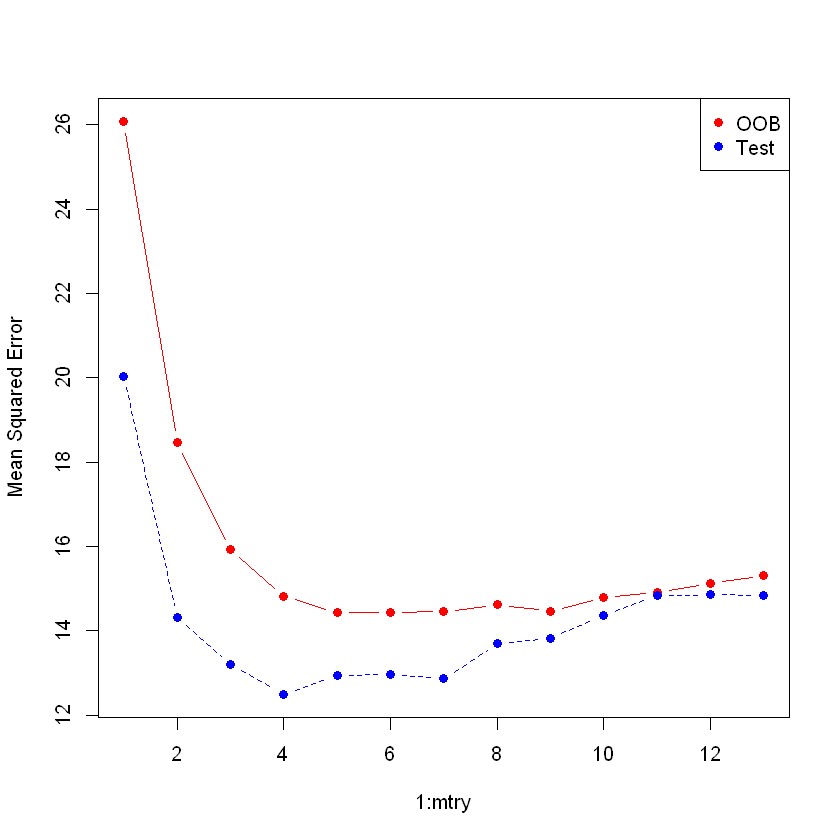

In [33]:
matplot(1:mtry, cbind(test.err, oob.err), pch = 19, col = c("red", "blue"), 
    type = "b", ylab = "Mean Squared Error")
legend("topright", legend = c("OOB", "Test"), pch = 19, col = c("red", "blue"))

Not too difficult! Although the test-error curve drops below the OOB curve, these are estimates based on data, and so have their own standard errors (which are typically quite large). Notice that the points at the end with mtry=13 correspond to bagging.

------
### Boosting

Boosting builds lots of smaller trees. Unlike random forests, each new tree in boosting tries to patch up the deficiencies of the current ensemble.

In [38]:
require(gbm)

In [35]:
?gbm

gbm {gbm},R Documentation
formula,a symbolic description of the model to be fit. The formula may include an offset term (e.g. y~offset(n)+x). If keep.data=FALSE in the initial call to gbm then it is the user's responsibility to resupply the offset to gbm.more.
distribution,"either a character string specifying the name of the distribution to use or a list with a component name specifying the distribution and any additional parameters needed. If not specified, gbm will try to guess: if the response has only 2 unique values, bernoulli is assumed; otherwise, if the response is a factor, multinomial is assumed; otherwise, if the response has class ""Surv"", coxph is assumed; otherwise, gaussian is assumed. Currently available options are ""gaussian"" (squared error), ""laplace"" (absolute loss), ""tdist"" (t-distribution loss), ""bernoulli"" (logistic regression for 0-1 outcomes), ""huberized"" (huberized hinge loss for 0-1 outcomes), ""multinomial"" (classification when there are more than 2 classes), ""adaboost"" (the AdaBoost exponential loss for 0-1 outcomes), ""poisson"" (count outcomes), ""coxph"" (right censored observations), ""quantile"", or ""pairwise"" (ranking measure using the LambdaMart algorithm). If quantile regression is specified, distribution must be a list of the form list(name=""quantile"",alpha=0.25) where alpha is the quantile to estimate. The current version's quantile regression method does not handle non-constant weights and will stop. If ""tdist"" is specified, the default degrees of freedom is 4 and this can be controlled by specifying distribution=list(name=""tdist"", df=DF) where DF is your chosen degrees of freedom. If ""pairwise"" regression is specified, distribution must be a list of the form list(name=""pairwise"",group=...,metric=...,max.rank=...) (metric and max.rank are optional, see below). group is a character vector with the column names of data that jointly indicate the group an instance belongs to (typically a query in Information Retrieval applications). For training, only pairs of instances from the same group and with different target labels can be considered. metric is the IR measure to use, one of conc:Fraction of concordant pairs; for binary labels, this is equivalent to the Area under the ROC Curve mrr:Mean reciprocal rank of the highest-ranked positive instance map:Mean average precision, a generalization of mrr to multiple positive instances ndcg:Normalized discounted cumulative gain. The score is the weighted sum (DCG) of the user-supplied target values, weighted by log(rank+1), and normalized to the maximum achievable value. This is the default if the user did not specify a metric. ndcg and conc allow arbitrary target values, while binary targets {0,1} are expected for map and mrr. For ndcg and mrr, a cut-off can be chosen using a positive integer parameter max.rank. If left unspecified, all ranks are taken into account. Note that splitting of instances into training and validation sets follows group boundaries and therefore only approximates the specified train.fraction ratio (the same applies to cross-validation folds). Internally, queries are randomly shuffled before training, to avoid bias. Weights can be used in conjunction with pairwise metrics, however it is assumed that they are constant for instances from the same group. For details and background on the algorithm, see e.g. Burges (2010)."
data,"an optional data frame containing the variables in the model. By default the variables are taken from environment(formula), typically the environment from which gbm is called. If keep.data=TRUE in the initial call to gbm then gbm stores a copy with the object. If keep.data=FALSE then subsequent calls to gbm.more must resupply the same dataset. It becomes the user's responsibility to resupply the same data at this point."
weights,an optional vector of weights to be used in the fitting process. Must be positive but do not need to be normalized. If keep.data=FALSE in the initial c

Distribution not specified, assuming gaussian ...


,var,rel.inf
lstat,lstat,34.5806809318973
rm,rm,32.7938934488111
dis,dis,8.21350039088562
crim,crim,5.21397276357172
nox,nox,4.89440591025806
ptratio,ptratio,3.50403369229647
black,black,3.28941350119168
age,age,3.13888052185196
chas,chas,1.47274836863666
tax,tax,1.43934273358018


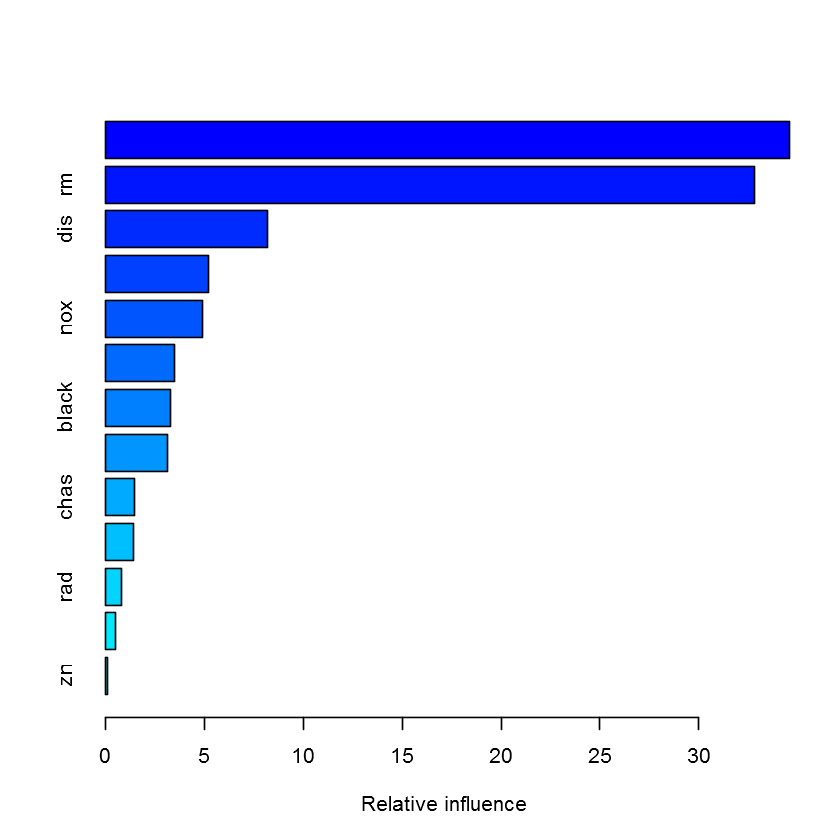

In [39]:
boost.boston = gbm(medv ~ ., data = Boston[train, ], 
                   n.trees = 10000, 
                   shrinkage = 0.01, 
                   interaction.depth = 4)
summary(boost.boston)

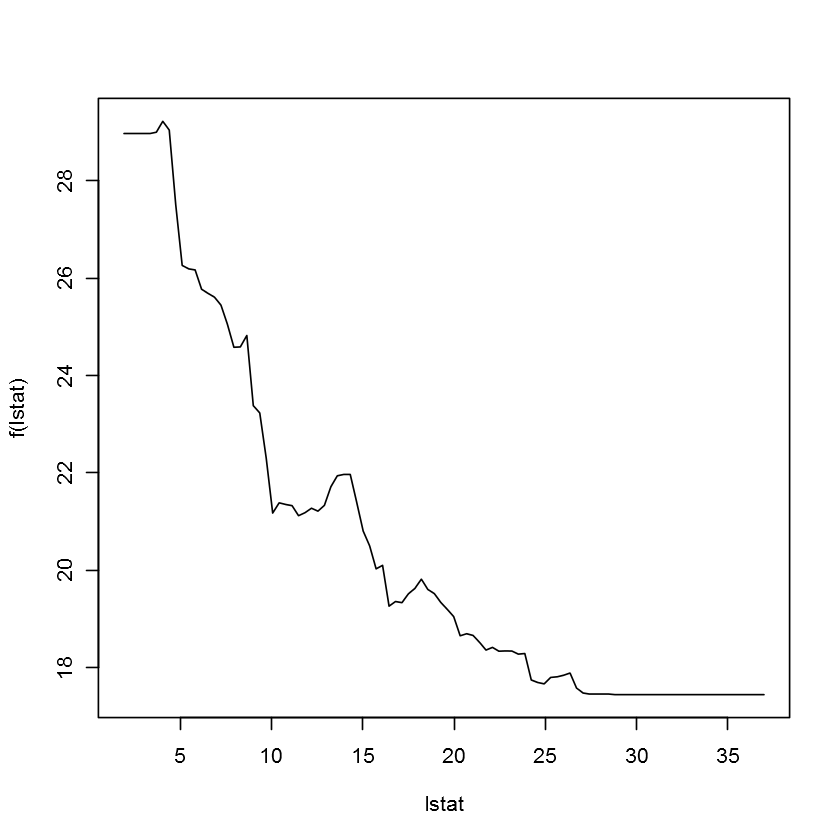

In [40]:
plot(boost.boston, i = "lstat")

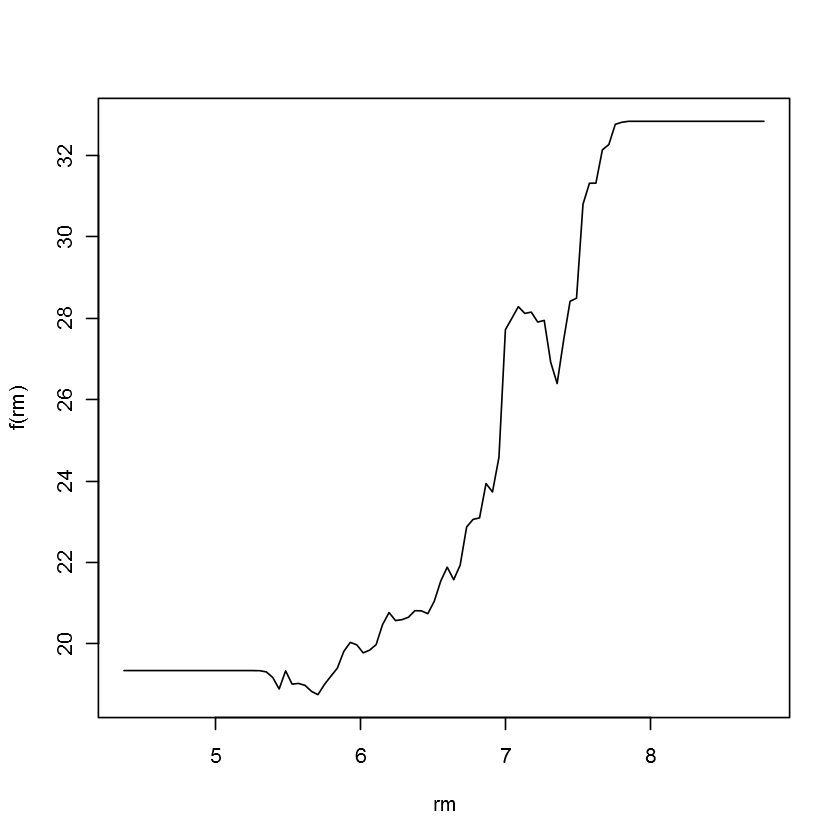

In [41]:
plot(boost.boston, i = "rm")

Lets make a prediction on the test set. With boosting, the number of trees is a tuning parameter, and if we have too many we can overfit. So we should use cross-validation to select the number of trees. We will leave this as an exercise. Instead, we will compute the test error as a function of the number of trees, and make a plot.

In [42]:
n.trees = seq(from = 100, to = 10000, by = 100)
predmat = predict(boost.boston, newdata = Boston[-train, ], n.trees = n.trees)
dim(predmat)

[1] 206 100

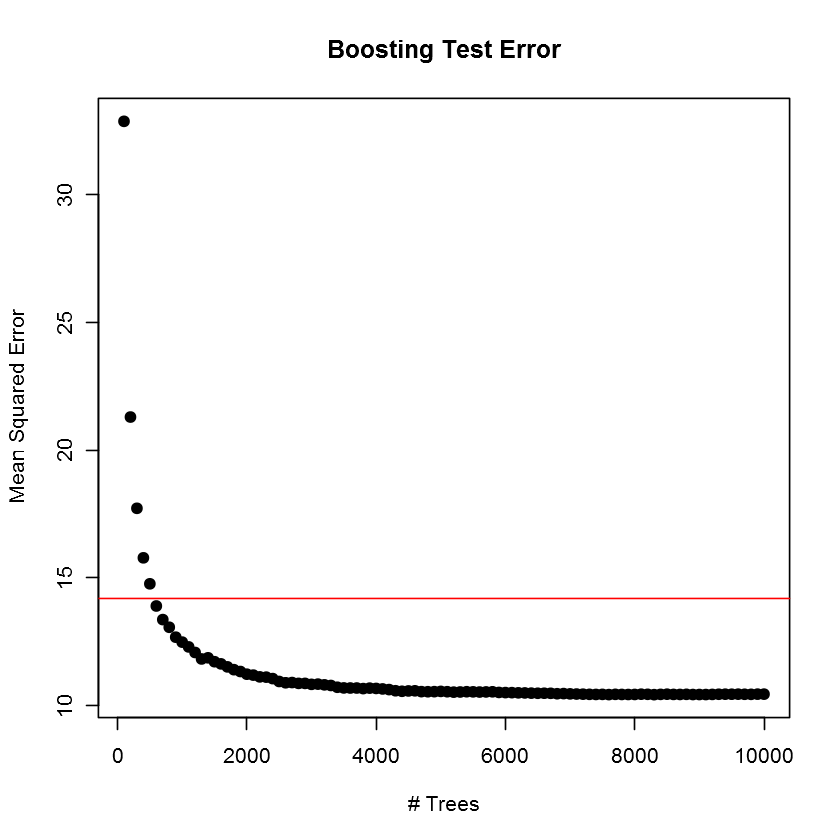

In [43]:
berr = with(Boston[-train, ], apply((predmat - medv)^2, 2, mean))
plot(n.trees, berr, pch = 19, ylab = "Mean Squared Error", xlab = "# Trees", 
    main = "Boosting Test Error")
abline(h = min(test.err), col = "red")